# ANEXO 01

## Análisis de datos exploratorio

En el siguiente documento se procede al estudio de las variables que utilizaremos para el desarrollo de nuestro modelo.

Cargamos las librerias

In [1]:
#General
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from datetime import datetime
#---------------------------------------------------------

#Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
from IPython.display import display # Mostrar muchos resultados en un output
#---------------------------------------------------------

#Estadísticos
import statsmodels.api as sm
from numpy import median

Cargamos los datos

In [2]:
%store -r data_cartera

data = data_cartera.copy()

## Análisis variable objetivo

Pintamos la variable de clientela total para ver la forma que tiene

In [3]:
# Agrupamos por la fecha
data_mes = data.groupby('Fecha_Mes').agg('sum')
data_mes['Fecha_Mes'] = data_mes.index
data_mes.reset_index(inplace=True, drop=True)

### Cartera total

[(7400000.0, 7850000.0)]

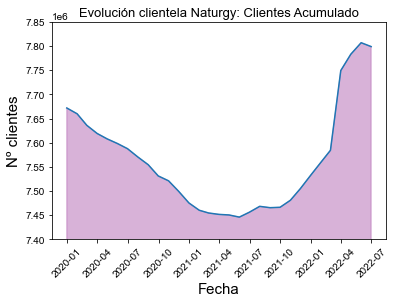

In [4]:
%matplotlib inline

ax = sns.lineplot(data = data_mes, x = data_mes['Fecha_Mes'], y = data_mes['Cartera_Acu'], markers=False)
l1 = ax.lines[0]
#l2 = ax.lines[1]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
#x2 = l2.get_xydata()[:,0]
#y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color='Purple', alpha=0.3)
#ax.set_xticklabels(labels= data_mes['Fecha_Mes'].dt.strftime('%Y-%m-%d') , rotation=45, fontsize = 10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, fontsize = 10)
ax.set_title('Evolución clientela Naturgy: Clientes Acumulado', fontsize = 13)
ax.set_xlabel('Fecha', fontsize = 15)
ax.set_ylabel('Nº clientes', fontsize = 15)
sns.set(rc = {'figure.figsize':(10,10)})
ax.set(ylim = (7400000,7850000))

In [5]:
data_mes['Cartera_Acu'].describe()

count    3.100000e+01
mean     7.563035e+06
std      1.092867e+05
min      7.446061e+06
25%      7.467354e+06
50%      7.532856e+06
75%      7.613520e+06
max      7.806971e+06
Name: Cartera_Acu, dtype: float64

Podemos afirmar que en los 31 meses se tiene:
    
<li>Media de 7.563.035 clientes</li>
<li>Un mínimo de 7.446.061 clientes en mayo de 2021</li>
<li>Un máximo de 7.806.971 clientes en Mayo de 2022</li>

In [6]:
clientes = data_mes['Cartera_Acu'].mean()/1.5
clientes_min = data_mes['Cartera_Acu'].min()/1.5
clientes_max = data_mes['Cartera_Acu'].max()/1.5
print('Número medio de clientes:',clientes)
print('Número máximo de clientes:', clientes_max)
print('Número mínimo de clientes:', clientes_min)

Número medio de clientes: 5042023.139784946
Número máximo de clientes: 5204647.333333333
Número mínimo de clientes: 4964040.666666667


### Neto M

Una medida complementaria a la cartera acumulada es "Neto M".
    
Esta variable no tiene en cuenta el histórico, siendo simplemente:
    
$$ Neto M = Altas M - Bajas M $$

[(-50000.0, 180000.0)]

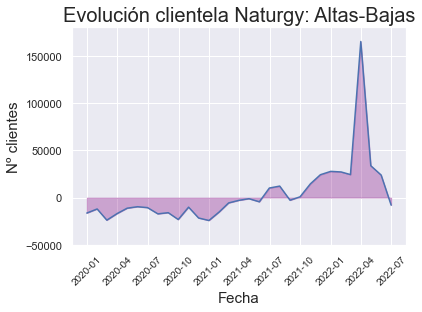

In [7]:
%matplotlib inline

ax = sns.lineplot(data = data_mes, x = data_mes['Fecha_Mes'], y = data_mes['Neto_M'], markers=False)
l1 = ax.lines[0]
#l2 = ax.lines[1]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
#x2 = l2.get_xydata()[:,0]
#y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="Purple", alpha=0.3)
#ax.set_xticklabels(labels= data_mes['Fecha_Mes'].dt.strftime('%Y-%m-%d') , rotation=45, fontsize = 10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, fontsize = 10)
ax.set_title('Evolución clientela Naturgy: Altas-Bajas', fontsize = 20)
ax.set_xlabel('Fecha', fontsize = 15)
ax.set_ylabel('Nº clientes', fontsize = 15)
sns.set(rc = {'figure.figsize':(10,10)})
ax.set(ylim = (-50000, 180000))

# Gráficos de exploración de datos

### Cartera por zona

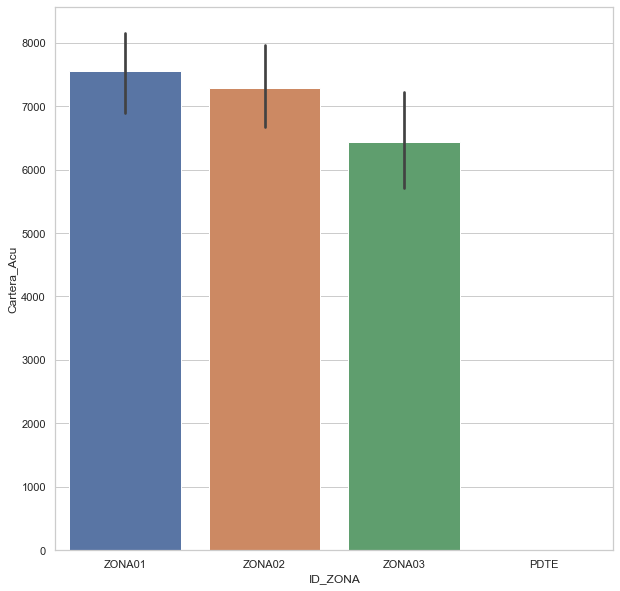

In [8]:
sns.set_theme(style='whitegrid')
tips = data
ax = sns.barplot(x='ID_ZONA', y='Cartera_Acu', data=data)

### Cartera por zona y año

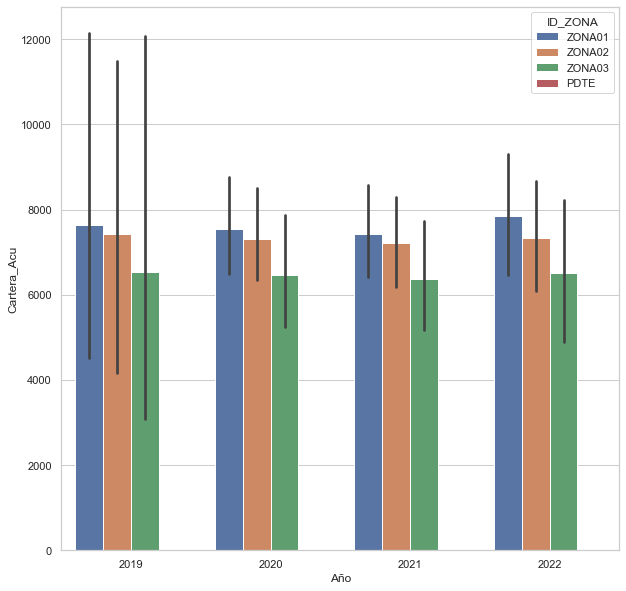

In [9]:
ax = sns.barplot(x='Año', y='Cartera_Acu', hue='ID_ZONA', data=data, order = [2019, 2020, 2021, 2022])

### Altas por ID producto agrupado

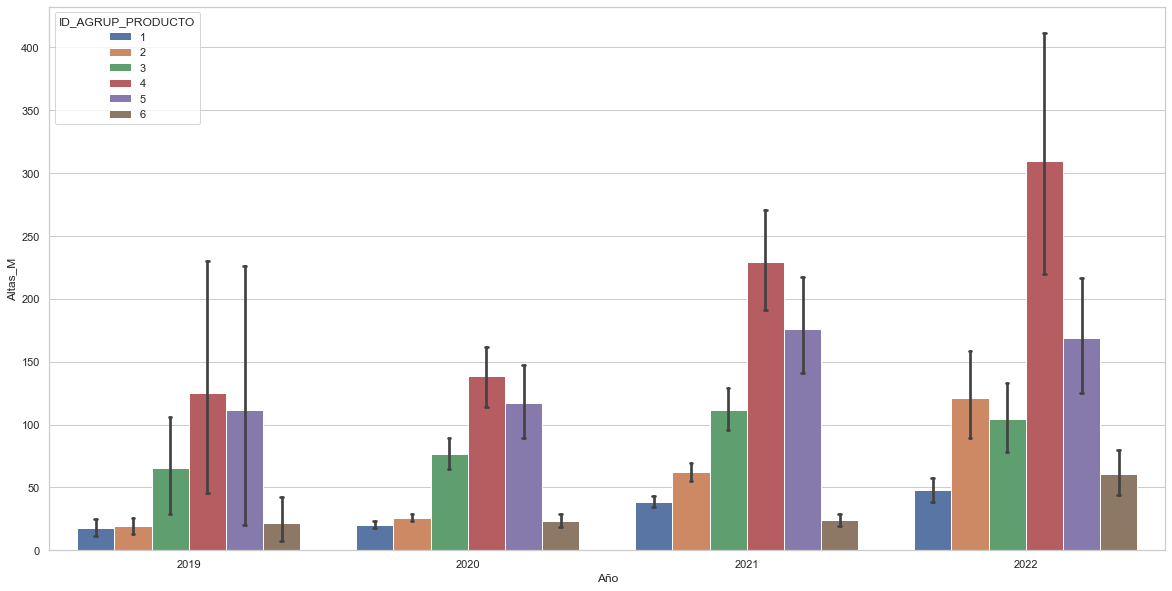

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='Año', y='Altas_M',hue='ID_AGRUP_PRODUCTO', data=data, capsize=.01, order = [2019, 2020, 2021, 2022])

### Altas por Línea de Negocio y año

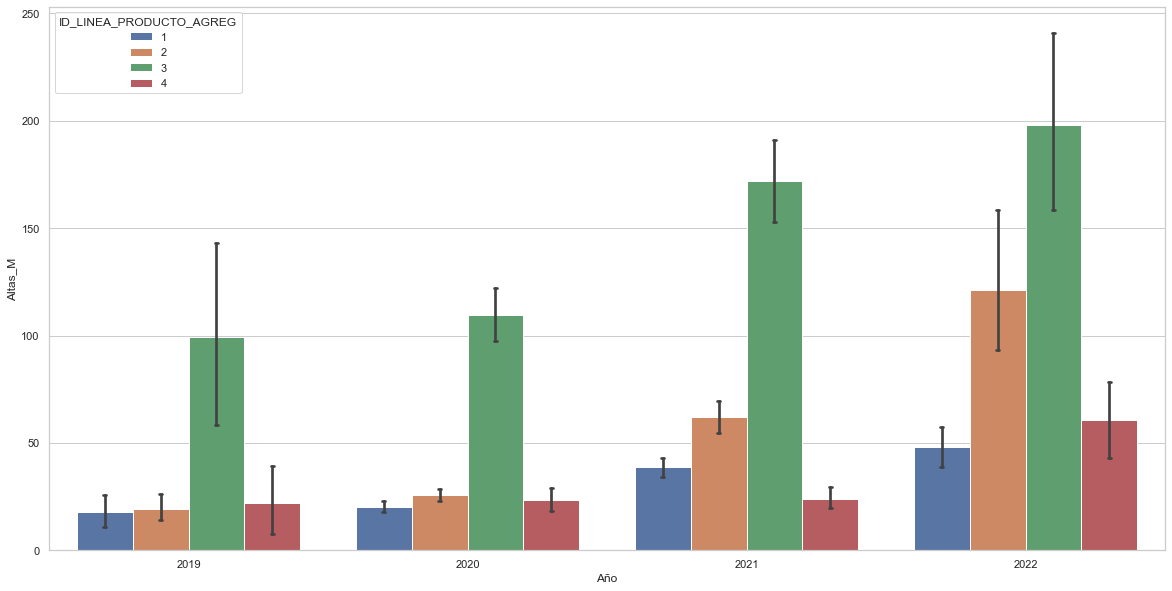

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='Año', y='Altas_M',hue='ID_LINEA_PRODUCTO_AGREG', data=data, capsize=.01, order = [2019, 2020, 2021, 2022])

### Bajas por línea de negocio y año

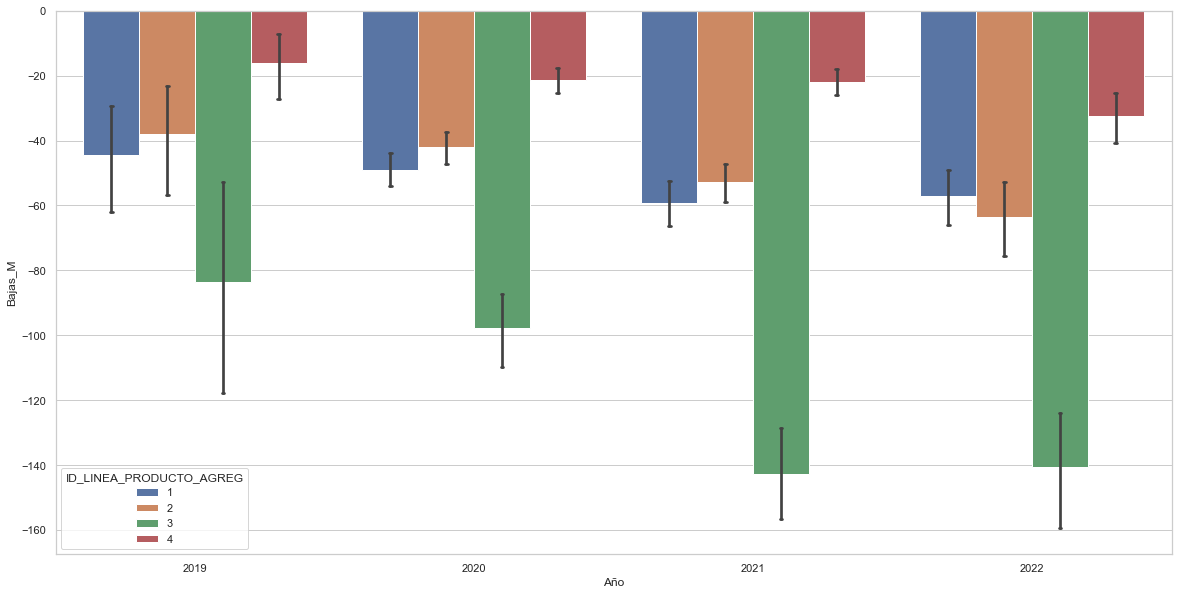

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='Año', y='Bajas_M',hue='ID_LINEA_PRODUCTO_AGREG', data=data, capsize=.01, order = [2019, 2020, 2021, 2022])

### Evolucion neto líneas de negocio

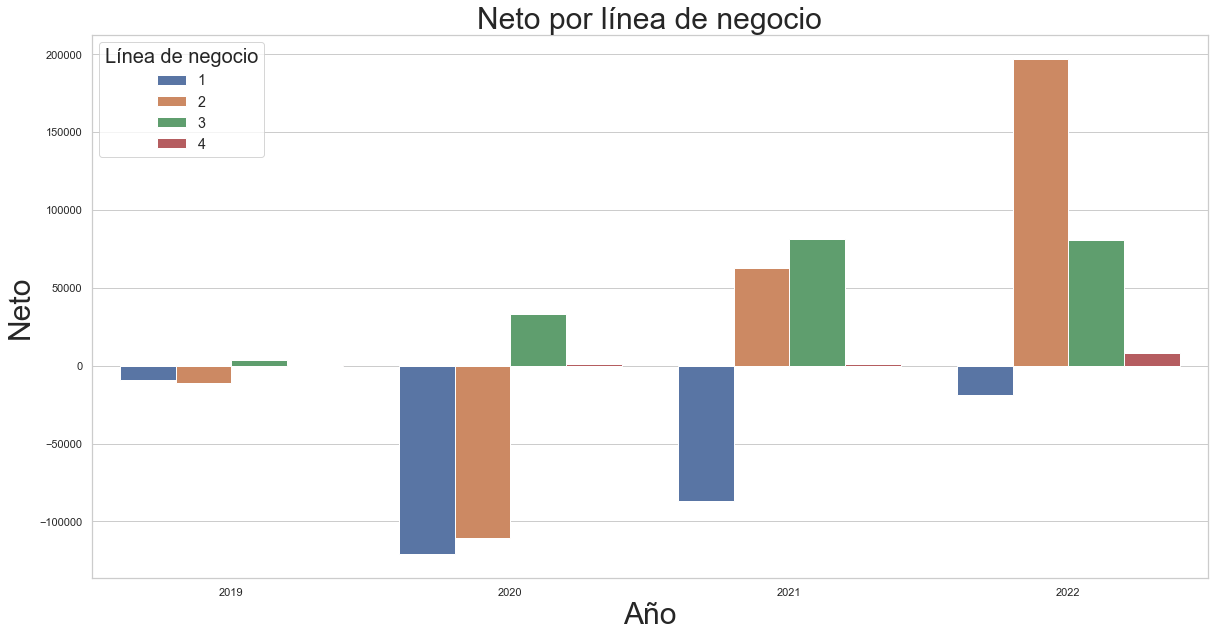

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='Año', y='Neto_M',hue='ID_LINEA_PRODUCTO_AGREG', data=data,
                 order = [2019, 2020, 2021, 2022],
                 ci = None,
                estimator = sum)

ax.set_xlabel('Año', fontsize = 30)
ax.set_ylabel('Neto', fontsize = 30)
ax.set_title('Neto por línea de negocio', fontsize = 30)
plt.legend(labels=['1','2','3','4'], title = 'Línea de negocio', 
           fontsize = 'large', title_fontsize = '20')

### Evolucion neto familias de productos


Text(0.5, 1.0, 'Neto por familia de producto')

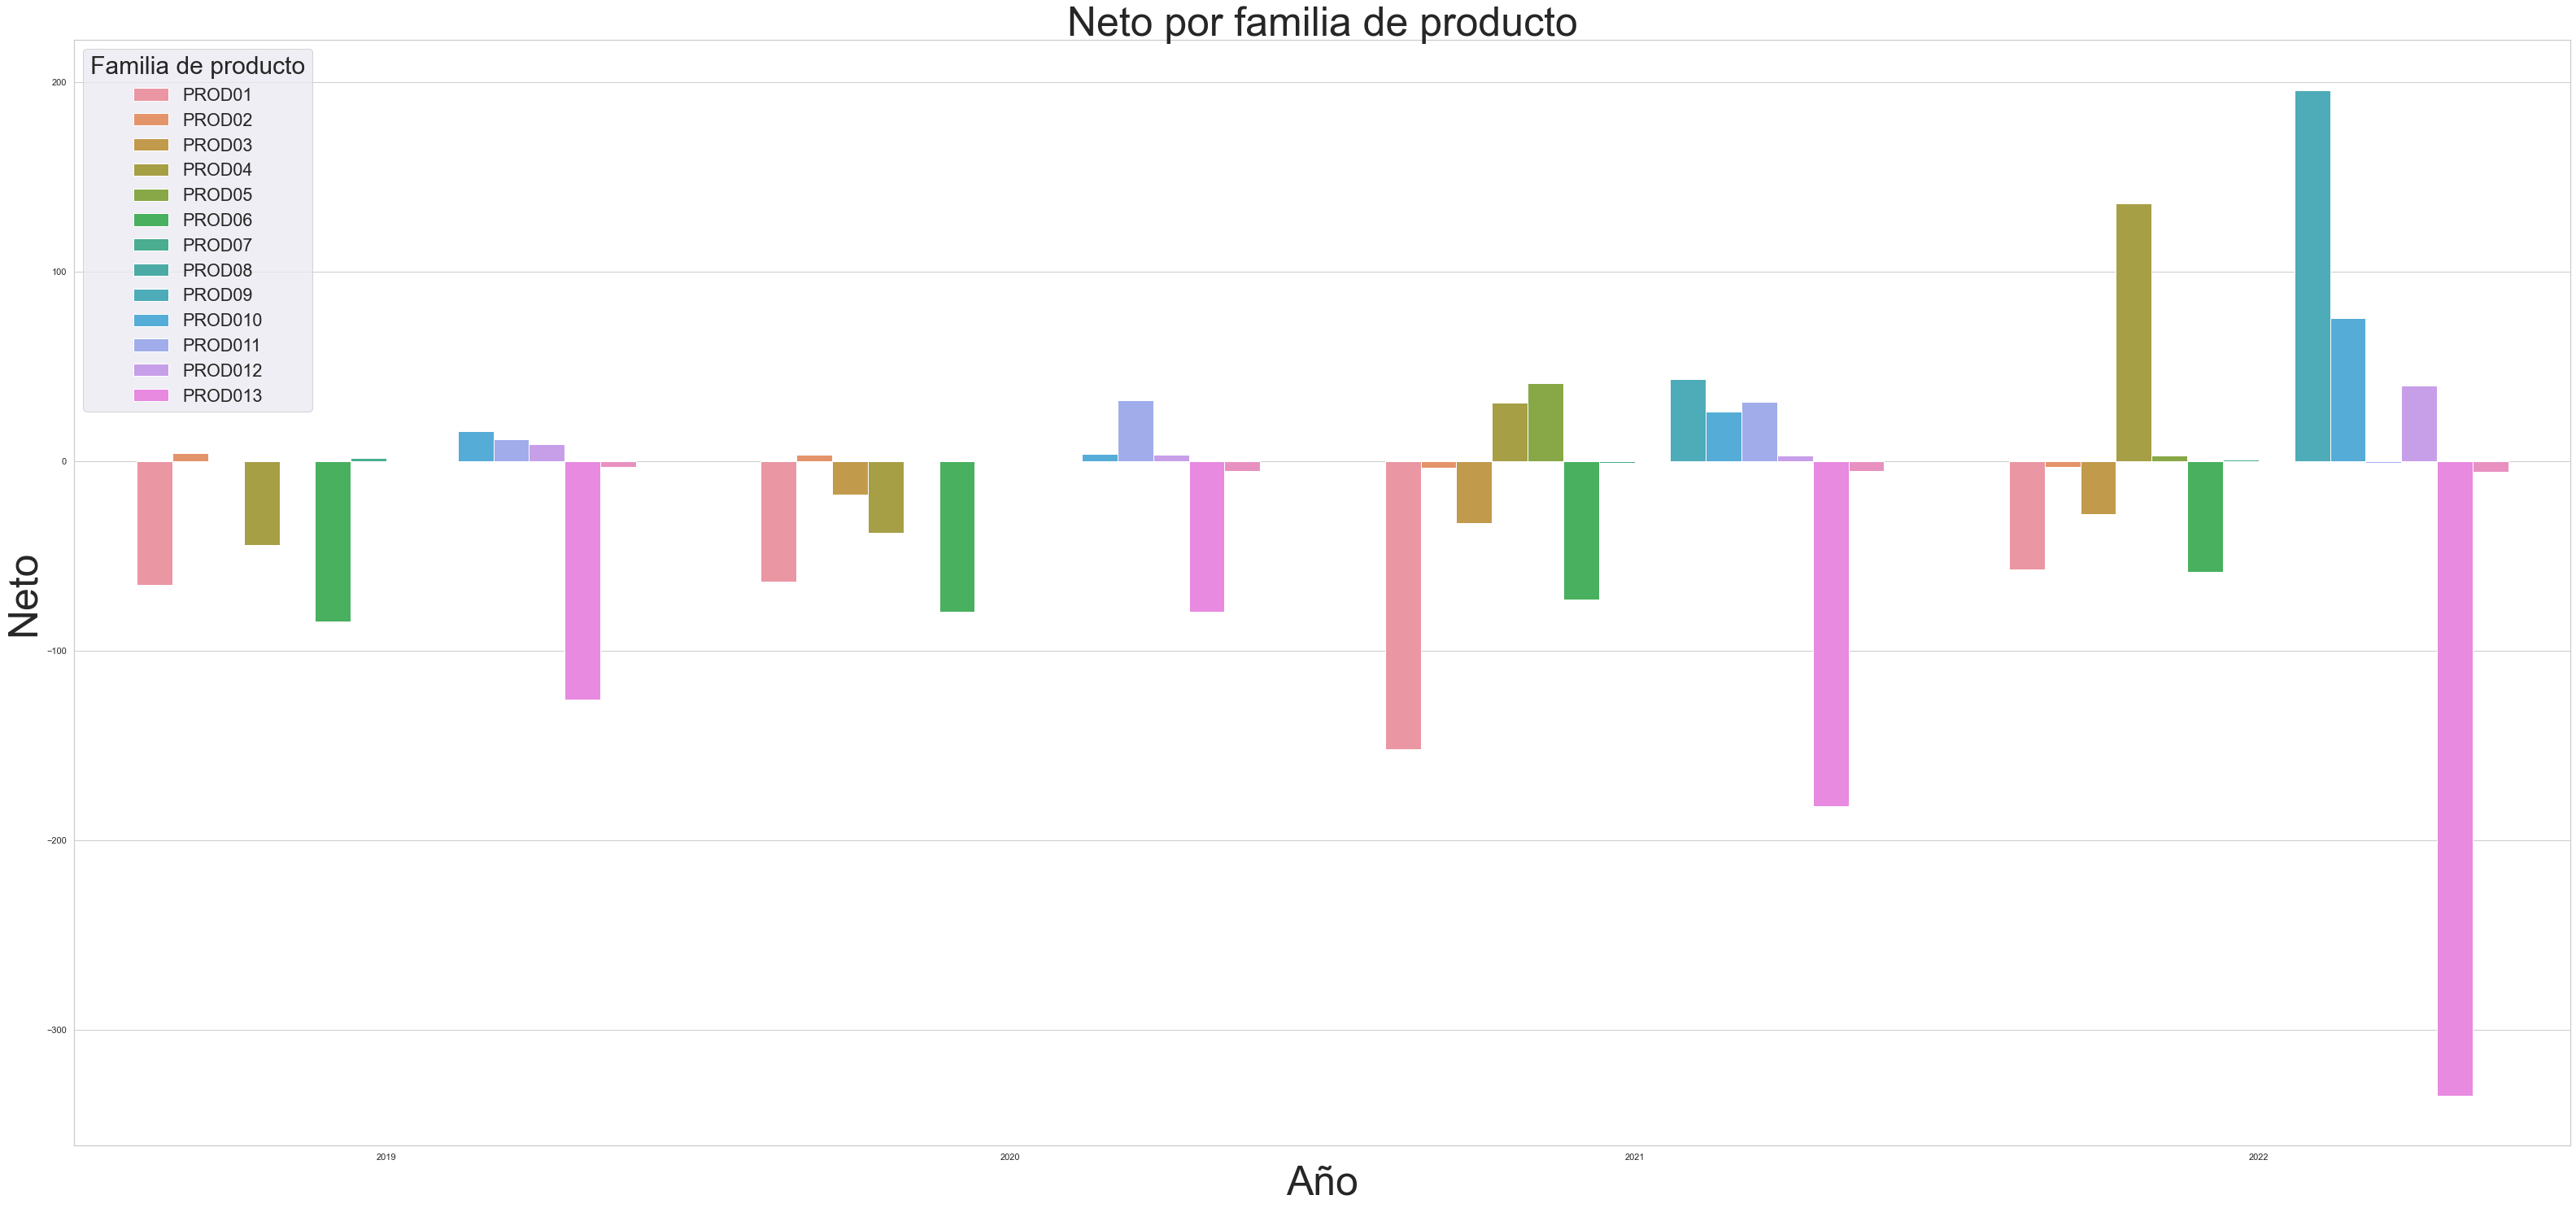

In [14]:
fig, ax = plt.subplots(figsize=(55, 25))

sns.set(font_scale = 1.5)

orderhue = data.groupby('ID_AGRUP_PROD').sum().sort_values('Neto_M').index

ax = sns.barplot(x='Año', y='Neto_M',hue='ID_AGRUP_PROD', data=data, order = [2019, 2020, 2021, 2022], ci= None)
plt.legend(labels=['PROD01','PROD02','PROD03','PROD04','PROD05','PROD06','PROD07','PROD08','PROD09','PROD010','PROD011','PROD012','PROD013'], title = 'Familia de producto', 
           fontsize = 'large', title_fontsize = '30',loc = 'upper left')

ax.set_xlabel('Año', fontsize = 50)
ax.set_ylabel('Neto', fontsize = 50)
ax.set_title('Neto por familia de producto', fontsize = 50)

In [15]:
#Divido df en años

groups = data.groupby(data.Año)
dosmildiecinueve_df = groups.get_group(2019)
dosmilveinte_df = groups.get_group(2020)
dosmilveintiuno_df = groups.get_group(2021)
dosmilveintidos_df = groups.get_group(2022)

### Evolucion neto familias de productos 2022

Text(0.5, 1.0, 'Neto por familia de producto 2022')

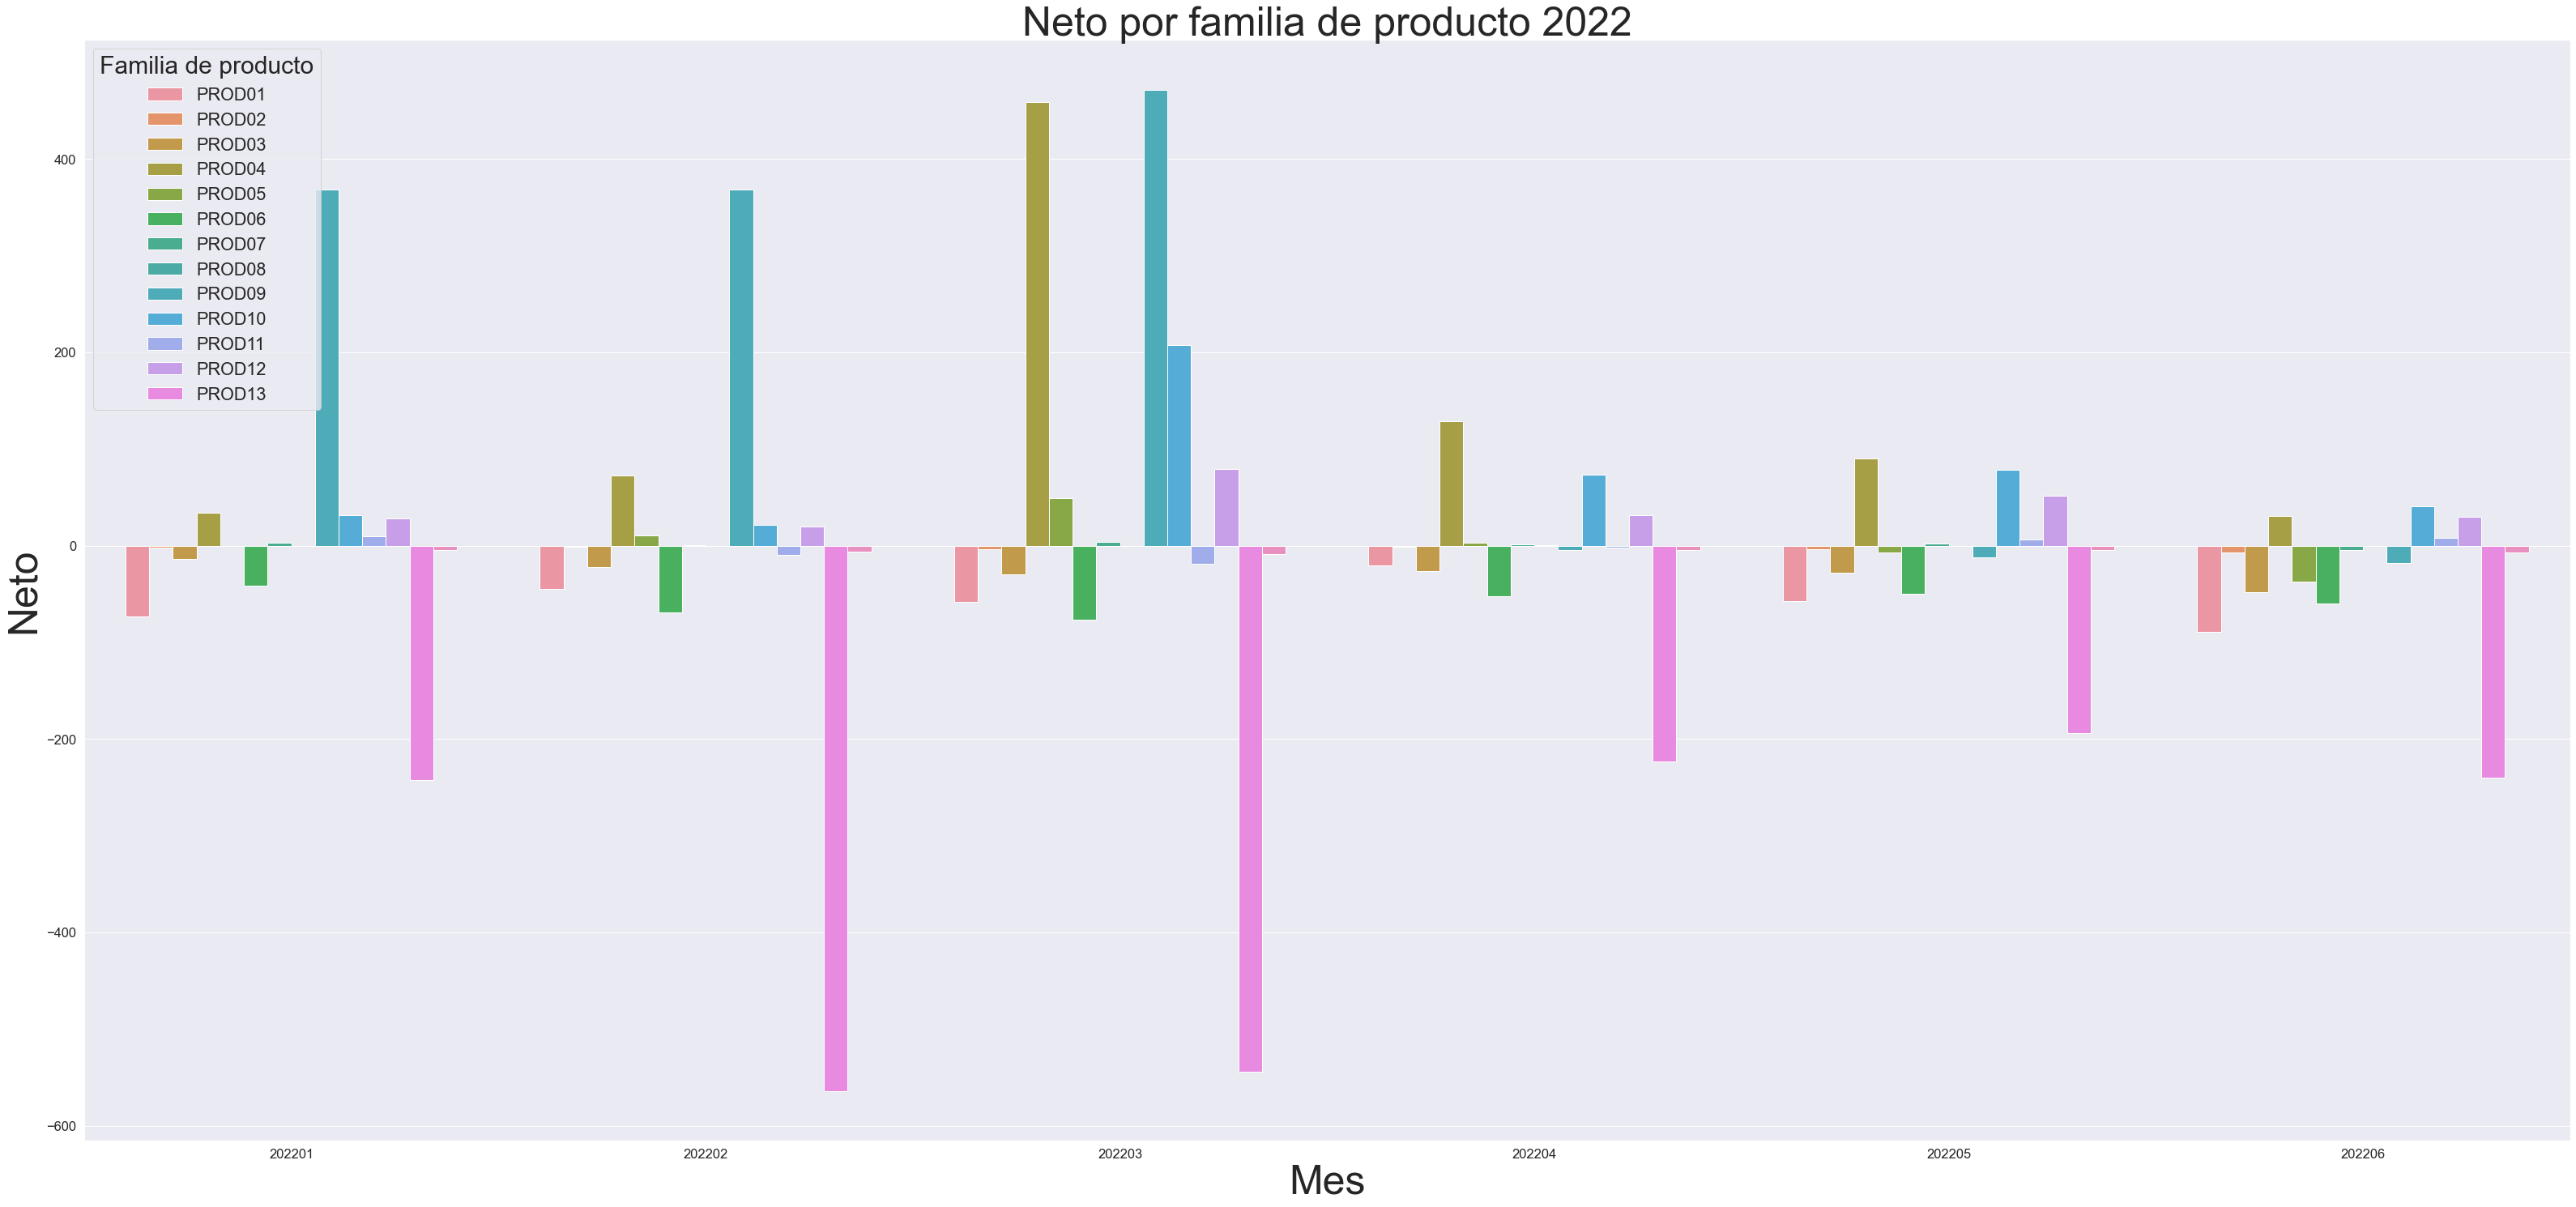

In [16]:
fig, ax = plt.subplots(figsize=(55, 25))
sns.set(font_scale = 1.5)

orderhue = dosmilveintidos_df.groupby('ID_AGRUP_PROD').sum().sort_values('Neto_M').index

ax = sns.barplot(x='ID_MES', y='Neto_M',hue='ID_AGRUP_PROD', data=dosmilveintidos_df,
                 order = [202201, 202202, 202203, 202204, 202205, 202206],
                 ci= None)
plt.legend(labels=['PROD01','PROD02','PROD03','PROD04','PROD05','PROD06','PROD07','PROD08','PROD09','PROD10','PROD11','PROD12','PROD13'], title = 'Familia de producto', 
           fontsize = 'large', title_fontsize = '30',loc = 'upper left')
ax.set_xlabel('Mes', fontsize = 50)
ax.set_ylabel('Neto', fontsize = 50)
ax.set_title('Neto por familia de producto 2022', fontsize = 50)

### Evolucion Cartera líneas de negocios

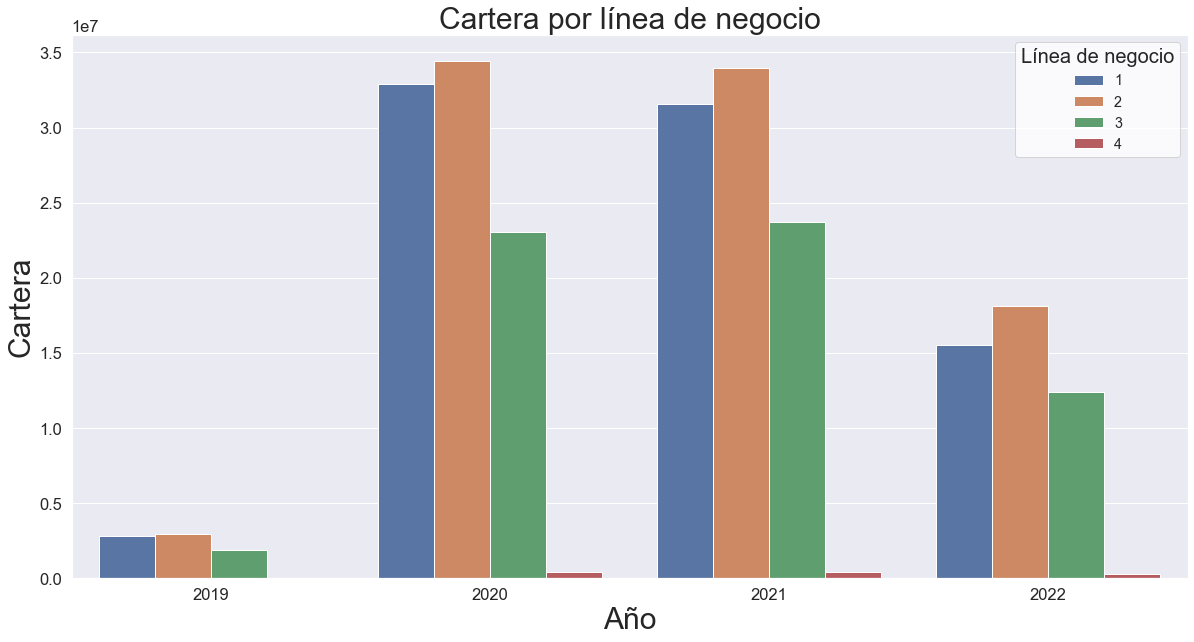

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='Año', y='Cartera_Acu',hue='ID_LINEA_PRODUCTO_AGREG', data=data,
                 order = [2019, 2020, 2021, 2022],
                 ci = None,
                estimator = sum)

ax.set_xlabel('Año', fontsize = 30)
ax.set_ylabel('Cartera', fontsize = 30)
ax.set_title('Cartera por línea de negocio', fontsize = 30)
plt.legend(labels=['1','2','3','4'], title = 'Línea de negocio', 
           fontsize = 'larger', title_fontsize = '20')

### Productos evolucion año

Text(0.5, 1.0, 'Neto por familia de producto 2019-2022')

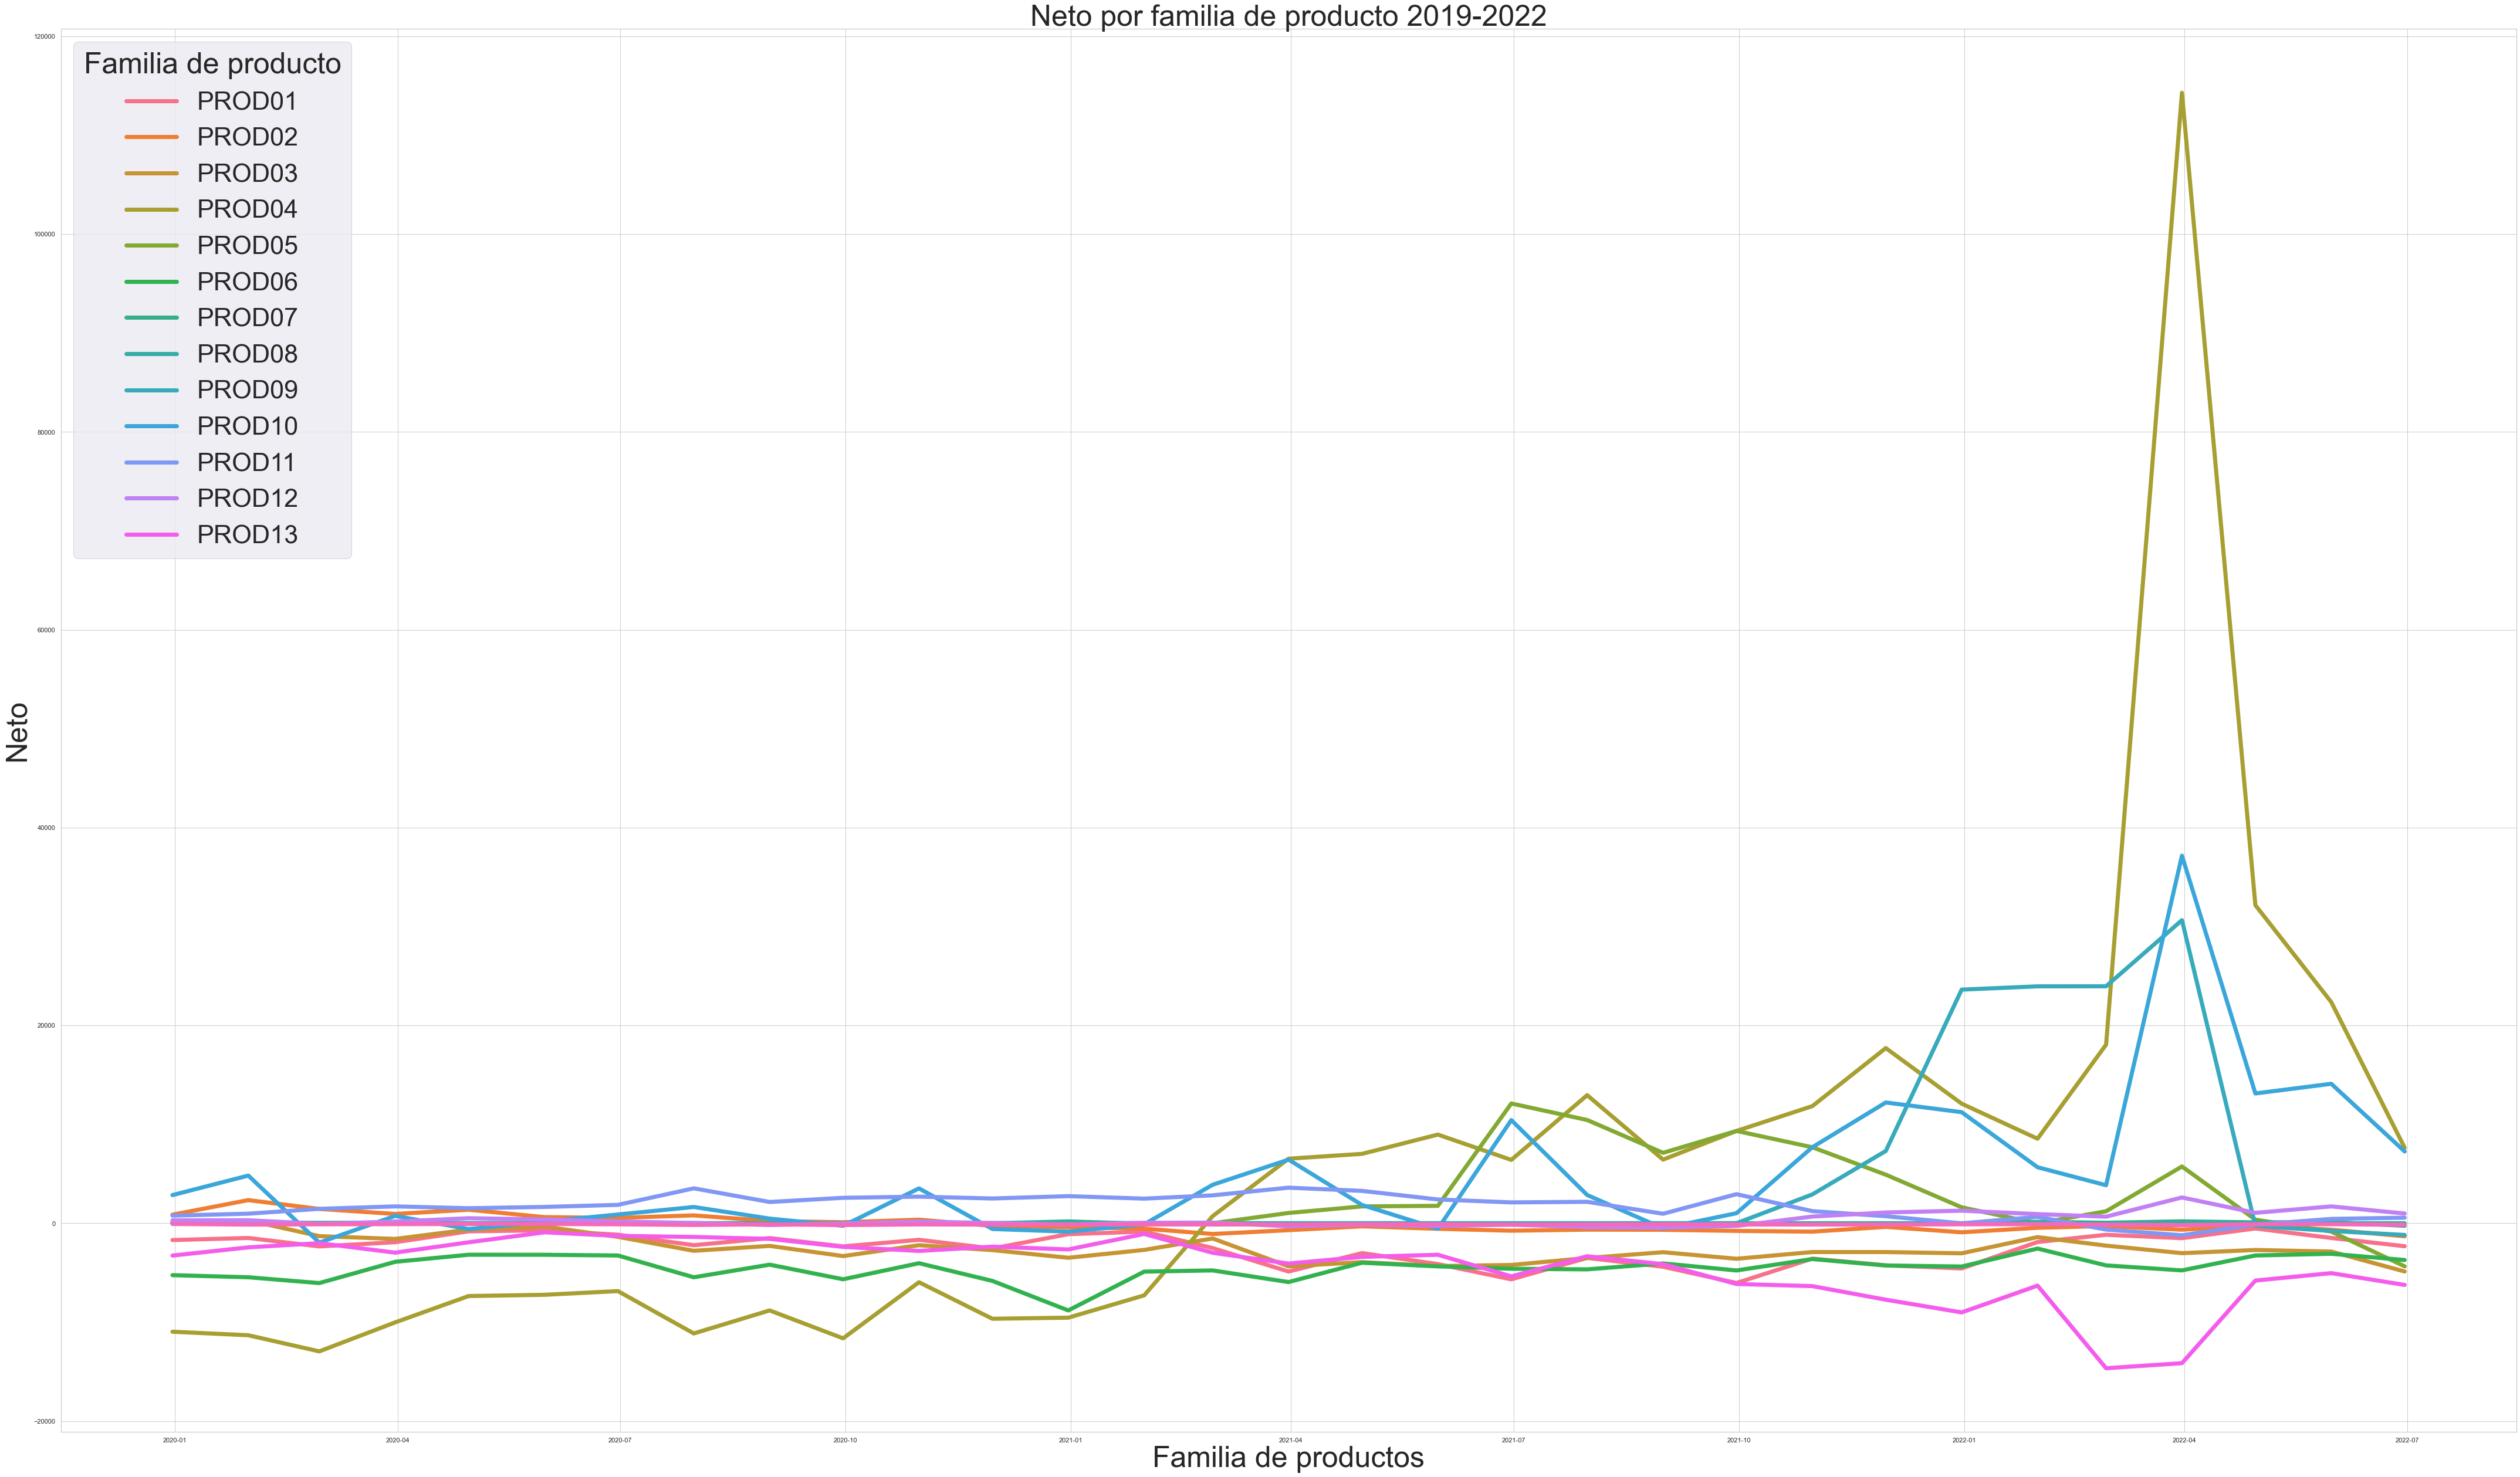

In [18]:
fig, ax = plt.subplots(figsize=(75, 44))
sns.set_theme(style='whitegrid')
sns.set(font_scale = 3)
sns.lineplot(data=data, x='Fecha_Mes', y='Neto_M', hue = 'ID_AGRUP_PROD', ci= None, estimator = sum, linewidth = 7)
plt.legend(labels=['PROD01','PROD02','PROD03','PROD04','PROD05','PROD06','PROD07','PROD08','PROD09','PROD10','PROD11','PROD12','PROD13'], title = 'Familia de producto', 
           fontsize = 'larger', title_fontsize = '50',loc = 'upper left')
ax.set_xlabel('Familia de productos', fontsize = 50)
ax.set_ylabel('Neto', fontsize = 50)
ax.set_title('Neto por familia de producto 2019-2022', fontsize = 50)

### Evolucion Cartera Zona

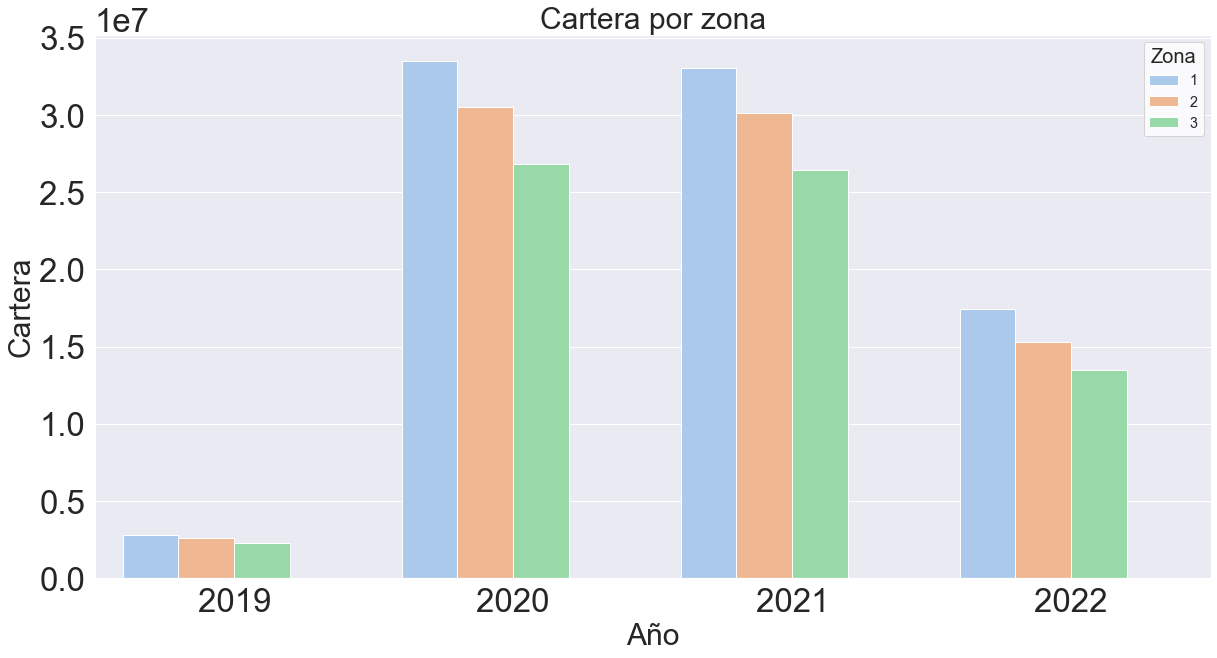

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid', palette='pastel')

ax = sns.barplot(x='Año', y='Cartera_Acu',hue='ID_ZONA', data=data,
                 order = [2019, 2020, 2021, 2022],
                 ci = None,
                estimator = sum)

ax.set_xlabel('Año', fontsize = 30)
ax.set_ylabel('Cartera', fontsize = 30)
ax.set_title('Cartera por zona', fontsize = 30)
plt.legend(labels = ['1', '2', '3'],title = 'Zona', 
           fontsize = 'larger', title_fontsize = '20')

### Evolucion Neto Zona

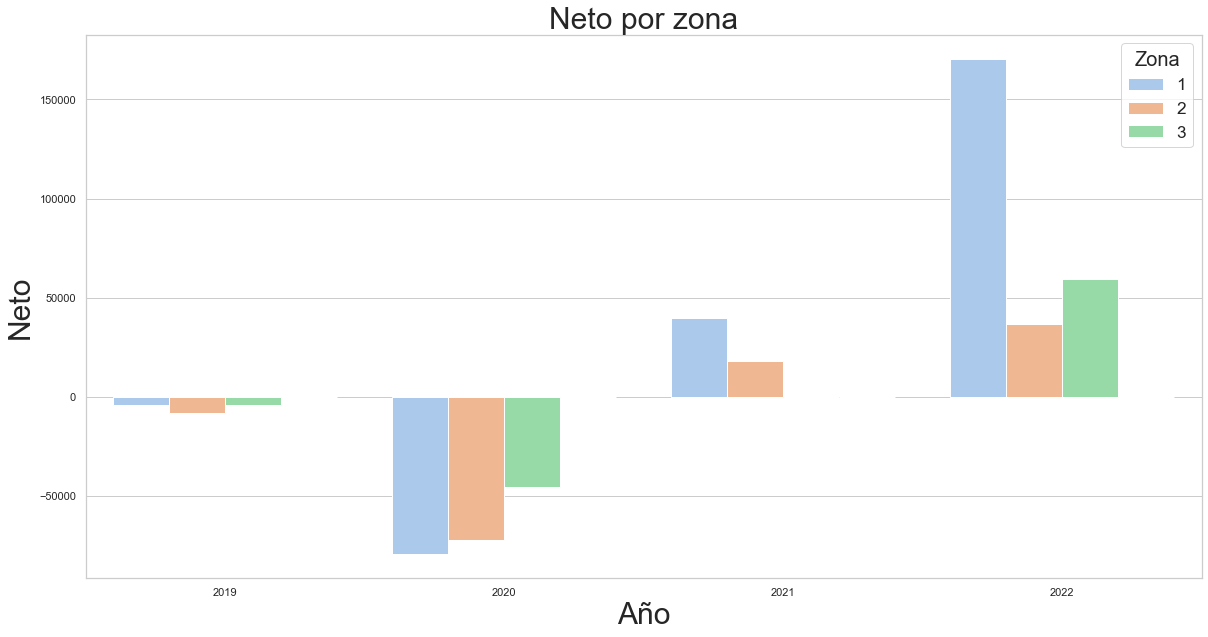

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid', palette='pastel')

ax = sns.barplot(x='Año', y='Neto_M',hue='ID_ZONA', data=data,
                 order = [2019, 2020, 2021, 2022],
                 ci = None,
                estimator = sum)

ax.set_xlabel('Año', fontsize = 30)
ax.set_ylabel('Neto', fontsize = 30)
ax.set_title('Neto por zona', fontsize = 30)
plt.legend(labels = ['1', '2', '3'],title = 'Zona', 
           fontsize = 'x-large', title_fontsize = '20')


### Canal evolucion año

Text(0.5, 1.0, 'Neto por canal 2019-2022')

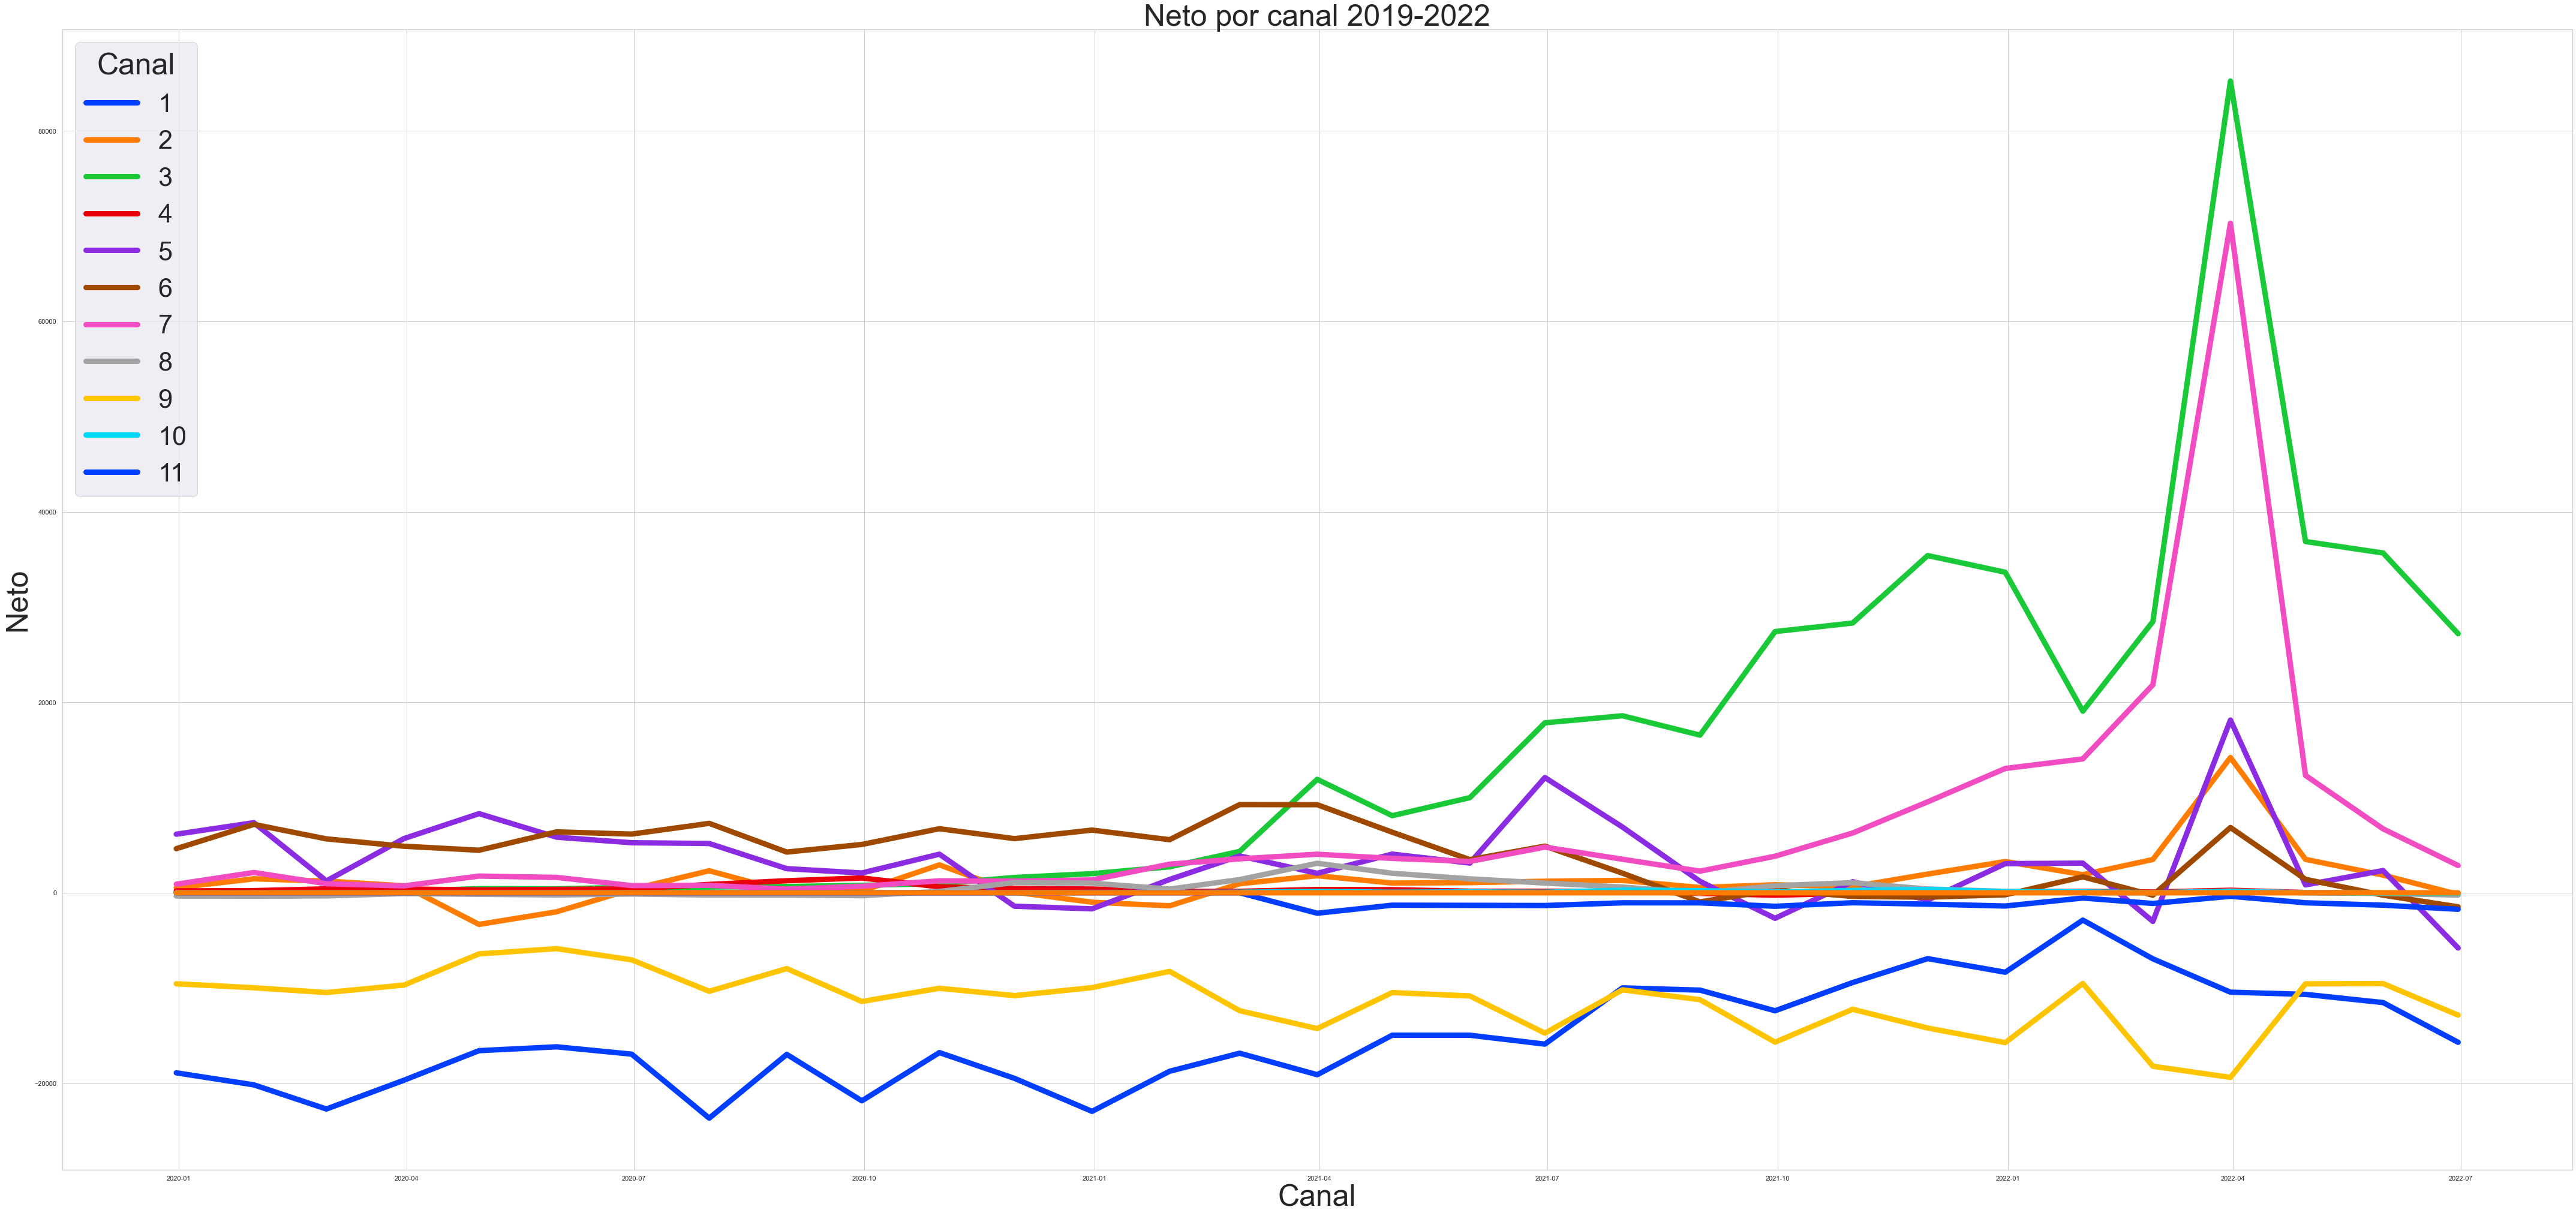

In [21]:
fig, ax = plt.subplots(figsize=(75, 35))
sns.set_style(style = 'whitegrid')
sns.set(font_scale = 3)
sns.lineplot(data=data, x='Fecha_Mes', y='Neto_M', hue = 'ID_AGRUP_CANAL',
             ci= None,
             estimator = sum,
             linewidth = 9,
             palette = 'bright'
             
            )
plt.legend(labels=['1','2','3','4','5','6','7','8','9','10','11'], title = 'Canal', 
           fontsize = 'larger', title_fontsize = '50',loc = 'upper left')
ax.set_xlabel('Canal', fontsize = 50)
ax.set_ylabel('Neto', fontsize = 50)
ax.set_title('Neto por canal 2019-2022', fontsize = 50)

### Cartera por canal 2019-2022

Text(0.5, 1.0, 'Cartera por canal 2019-2022')

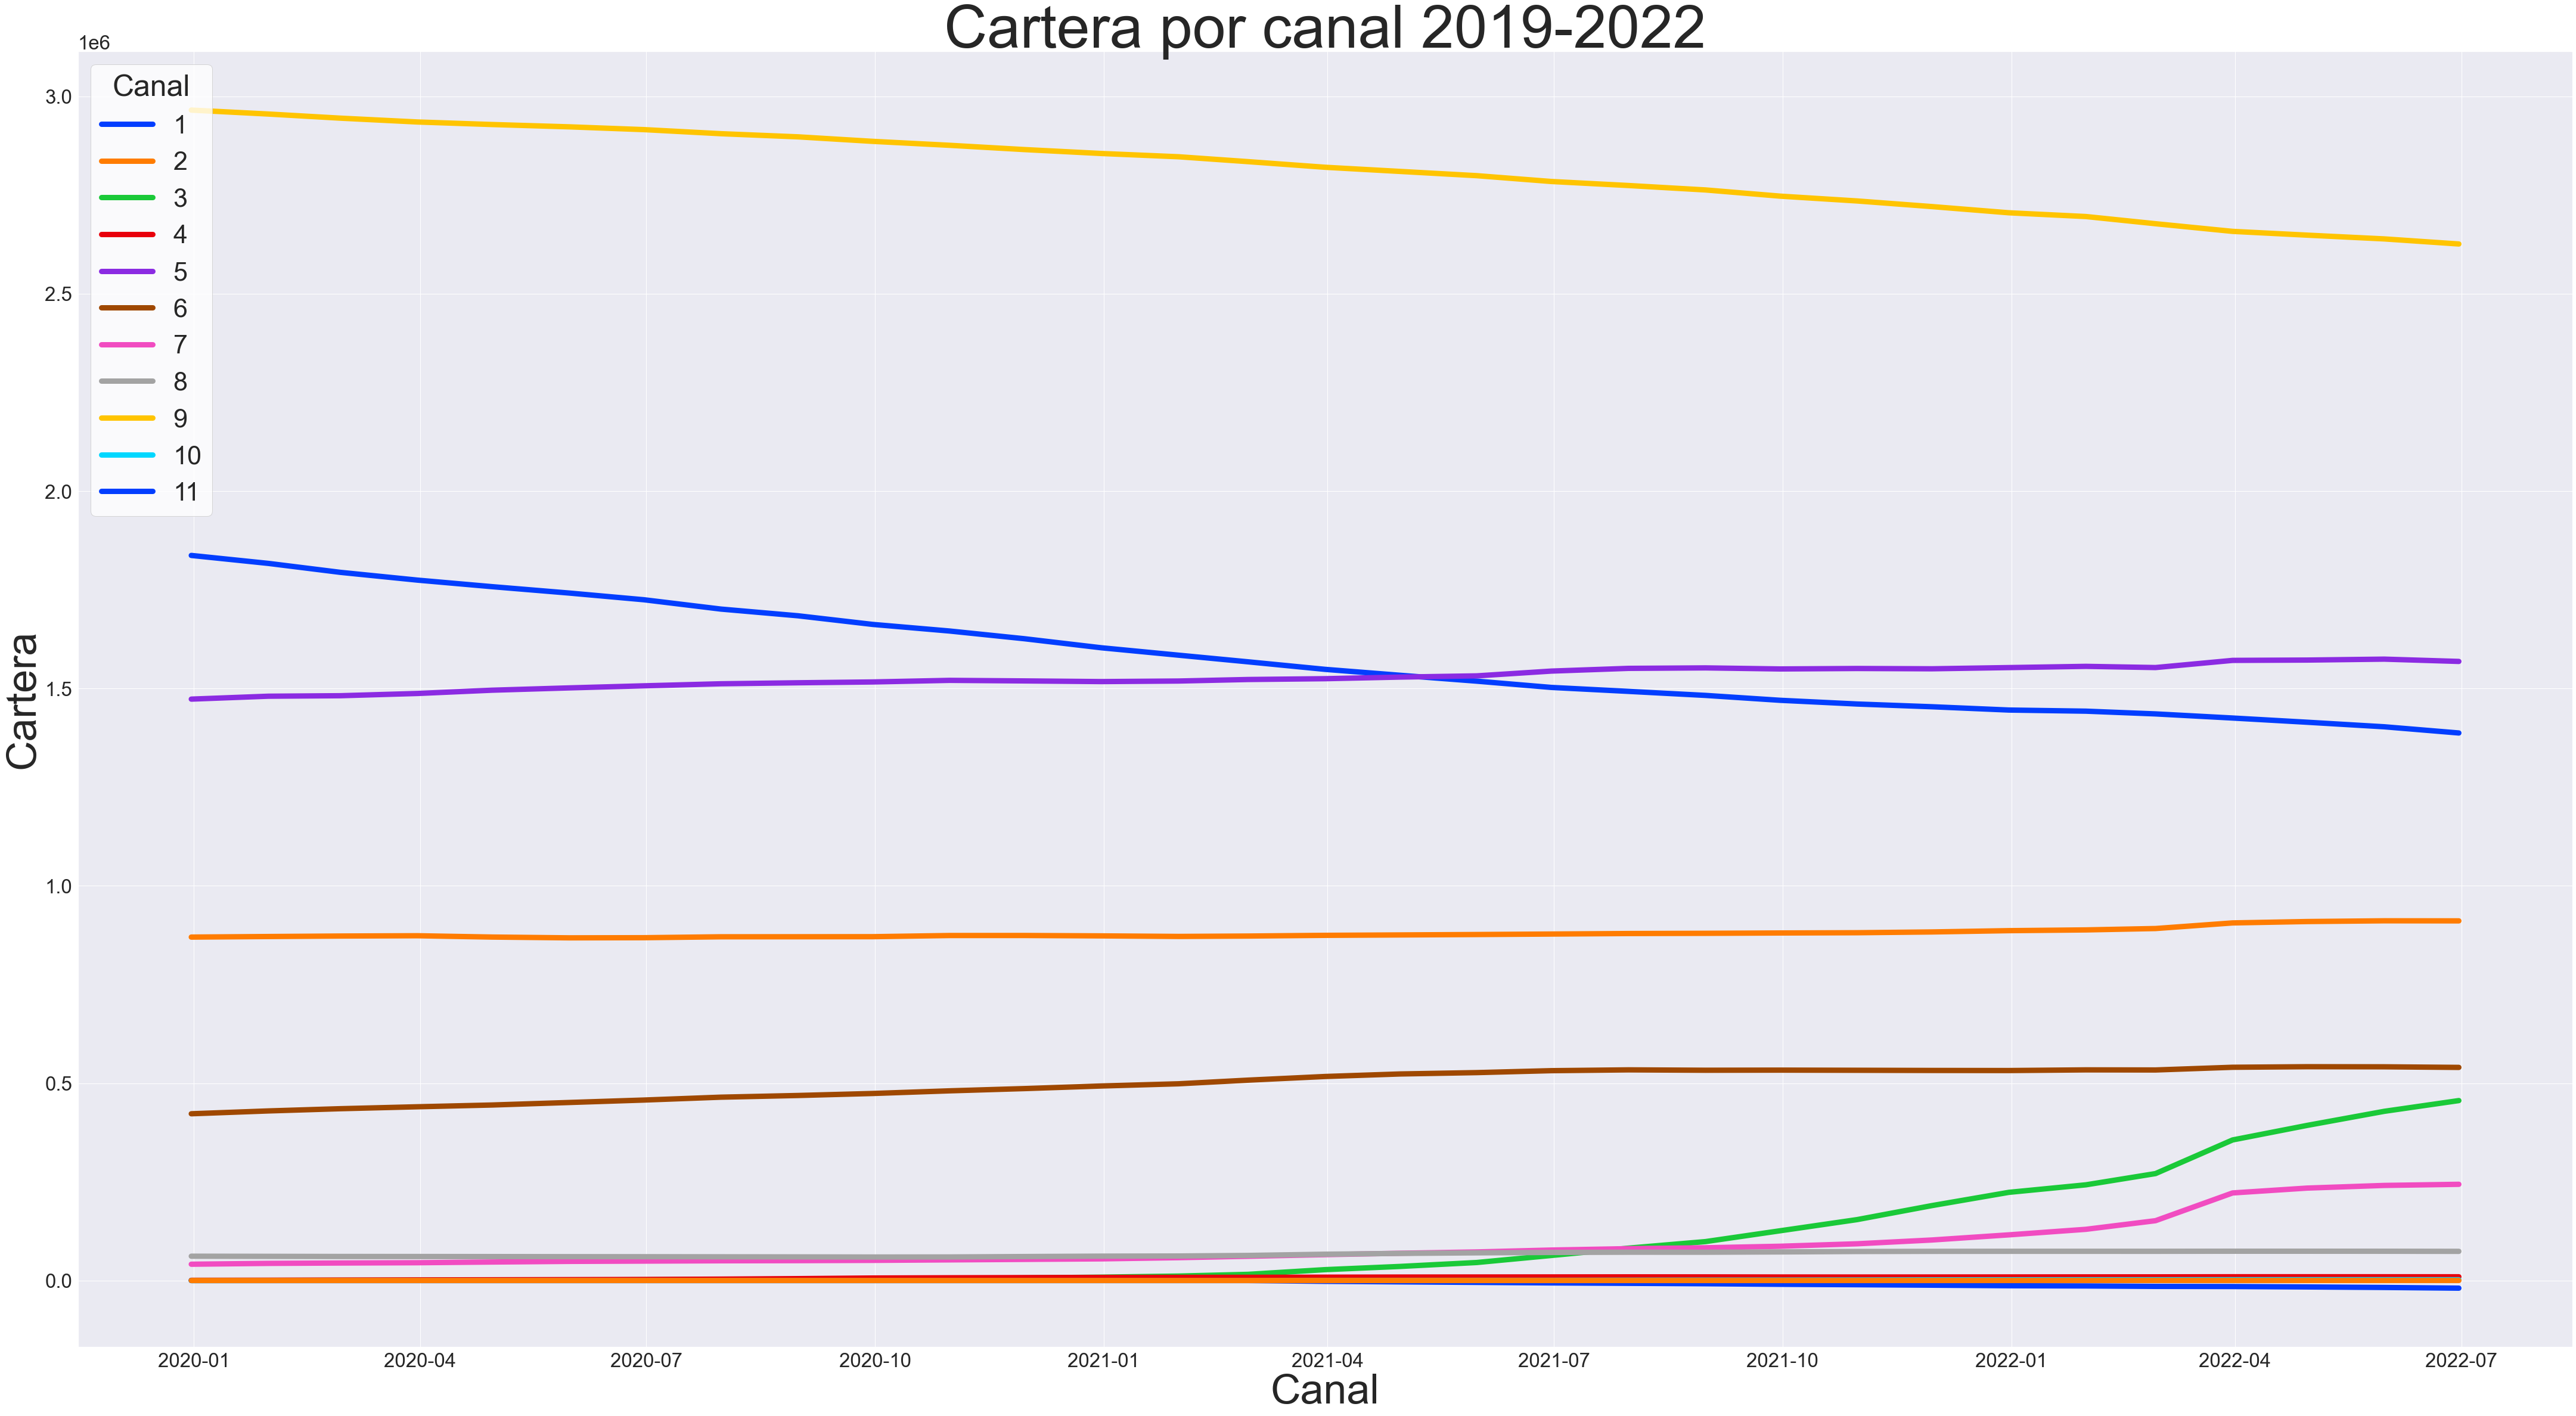

In [22]:
fig, ax = plt.subplots(figsize=(75, 40))

plt.style.use('fast')
sns.set(font_scale = 3, style= 'whitegrid')
sns.lineplot(data=data, x='Fecha_Mes', y='Cartera_Acu', hue = 'ID_AGRUP_CANAL',
             ci= None,
             estimator = sum,
             linewidth = 9,
             palette = 'bright'
            )
plt.legend(labels=['1','2','3','4','5','6','7','8','9','10','11'], title = "Canal", 
           fontsize = 'larger', title_fontsize = '50',loc = "upper left")
ax.set_xlabel('Canal', fontsize = 70)
ax.set_ylabel('Cartera', fontsize = 70)
ax.set_title('Cartera por canal 2019-2022', fontsize = 100)